In [1]:
import pandas as pd
import numpy as np
import os
import pandas as pd
from PIL import Image
from tqdm import tqdm

In [2]:
gpt = pd.read_csv('../Data/new_gpt2.csv')
human = pd.read_csv('../Data/new_human.csv')

In [3]:
gpt.head()

,Unnamed: 0,Generation,label
0,0,latest headlines on cnn business - google's go...,gpt2
1,1,china wants to take a victory lap over its han...,gpt2
2,2,coronavirus disinformation creates challenges ...,gpt2
3,3,china coronavirus: eating wild animals made il...,gpt2
4,4,china's economy could shrink for the first tim...,gpt2


In [4]:
human.head()

,Unnamed: 0,Generation,label
0,0,Latest Headlines on CNN Business the great shu...,human
1,1,China wants to take a victory lap over its han...,human
2,2,Coronavirus disinformation creates challenges ...,human
3,3,China coronavirus: Eating wild animals made il...,human
4,4,China's economy could shrink for the first tim...,human


In [5]:
import pandas as pd
import torch
from transformers import BertTokenizer, BertModel


In [6]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')


In [7]:
def generate_bert_embeddings(text):
    inputs = tokenizer(text, return_tensors='pt', padding=True, truncation=True, max_length=512)
    with torch.no_grad():
        outputs = model(**inputs)
        embeddings = torch.mean(outputs.last_hidden_state, dim=1)  # Mean pooling of token embeddings
    return embeddings.numpy()


In [22]:
val = gpt['Generation'][10]
print(len(val))

2386


In [23]:
val[1066]

'd'

In [27]:
embedding =generate_bert_embeddings(val)


In [30]:
print((embedding.shape))

(1, 768)


In [ ]:
print(embedding)

In [32]:
import numpy as np

def min_max_normalize(embeddings):
    # Find the minimum and maximum values in the embeddings
    min_val = np.min(embeddings)
    max_val = np.max(embeddings)
    
    # Normalize the embeddings to range [0, 255]
    normalized_embeddings = 255 * (embeddings - min_val) / (max_val - min_val)
    
    return normalized_embeddings.astype(np.uint8)  # Convert to uint8 for integer values between 0 and 255

# Assuming embeddings is your embedding vector obtained from generate_bert_embeddings(text)
normalized_embeddings = min_max_normalize(embedding)


In [ ]:
print(normalized_embeddings)

In [36]:
reshaped_embeddings = normalized_embeddings.reshape(32, 24)

In [37]:
reshaped_embeddings

array([[181, 179, 197, 183, 208, 175, 195, 232, 188, 180, 190, 164, 155,
        222, 181, 218, 216, 187, 172, 224, 209, 196, 196, 236],
       [205, 177, 192, 196, 181, 180, 226, 195, 168, 169, 193, 196, 180,
        173, 175, 189, 142, 166, 158, 191, 195, 162, 220, 204],
       [198, 182, 161, 204, 190, 171, 216, 219, 173, 160, 155, 162, 184,
        182, 196, 155, 199, 195, 187, 219, 148, 160, 167, 178],
       [183, 181, 191, 185, 176, 194, 194, 188, 171, 220, 171, 218, 197,
        188, 201, 220, 166, 217, 187, 188, 199, 188, 194, 188],
       [219, 194, 161, 216, 205, 166, 203, 197, 192, 172, 201, 188, 176,
        210, 193, 171, 184, 162, 177, 198, 178, 169, 199, 197],
       [207, 179, 186, 232, 167, 184, 176, 198, 173, 182, 211, 210, 198,
        174, 176, 214, 174, 170, 161, 206, 206, 157, 214, 205],
       [196, 188, 174, 169, 205, 192, 201, 190, 191, 175, 183, 182, 173,
        201, 194, 186, 219, 174, 192, 197, 191, 199, 189, 234],
       [180, 205, 176, 195, 252, 174, 218

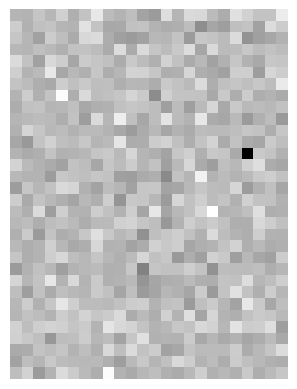

In [38]:
import matplotlib.pyplot as plt
plt.imshow(reshaped_embeddings, cmap='gray')  # Assuming grayscale image
plt.axis('off')  # Hide axes
plt.show()

In [23]:
gpt.head()

,Unnamed: 0,Generation,label,embeddings
0,0,latest headlines on cnn business - google's go...,gpt2,"[[-0.13570294, -0.04754151, 0.352358, 0.226810..."
1,1,china wants to take a victory lap over its han...,gpt2,"[[-0.39471674, -0.15344626, 0.09726799, -0.194..."
2,2,coronavirus disinformation creates challenges ...,gpt2,"[[-0.2964845, 0.009268108, 0.013801753, -0.065..."
3,3,china coronavirus: eating wild animals made il...,gpt2,"[[-0.05371213, 0.023594754, 0.10417935, -0.185..."
4,4,china's economy could shrink for the first tim...,gpt2,"[[-0.6155898, -0.17937079, 0.20588559, 0.13464..."


In [15]:
human['embeddings'] = human['Generation'].apply(generate_bert_embeddings)

In [24]:
human.head()

,Unnamed: 0,Generation,label,embeddings
0,0,Latest Headlines on CNN Business the great shu...,human,"[[-0.022988277, -0.16985631, 0.17306148, 0.239..."
1,1,China wants to take a victory lap over its han...,human,"[[-0.21338622, -0.043899264, 0.1525899, -0.207..."
2,2,Coronavirus disinformation creates challenges ...,human,"[[0.060061373, 0.027683925, 0.17691158, -0.114..."
3,3,China coronavirus: Eating wild animals made il...,human,"[[-0.056837402, 0.029993335, 0.02434342, -0.00..."
4,4,China's economy could shrink for the first tim...,human,"[[-0.40924907, -0.16960874, 0.35779798, 0.0272..."


In [17]:
len(gpt)

1066

In [26]:
sample_encoding = gpt['embeddings'].iloc[0]

In [29]:
print(sample_encoding.shape)

(1, 768)


In [30]:

def textToImageChannelAvg(text, size = 32):
    text += '0'*(len(text) % pow(32, 2))
    
    cgr_chunks = []
    i = 0
    while i < len(text):
        cgr_chunks.append(text[i:min(i + pow(size,2), len(text) - i)])
        i += pow(size, 2)

    images = []
    for chunk in cgr_chunks:
        if len(chunk) < pow(size, 2):
            chunk += "0" * (pow(size, 2) - len(chunk))
        numbers_array = np.array([int(char) for char in chunk])
        scaled_array = (numbers_array / 3) * 255
        grayscale_image = scaled_array.reshape(size, size).astype(np.uint8)
        images.append(grayscale_image)

    stacked_image = np.stack(images, axis = 0)
    avg_image = np.mean(stacked_image, axis = 0)

    return avg_image

def textToImage(text, size = 32):
    text += '0'*(len(text) % pow(32, 2))
    
    cgr_chunks = []
    i = 0
    while i < len(text):
        cgr_chunks.append(text[i:min(i + pow(size,2), len(text) - i)])
        i += pow(size, 2)

    images = []
    for chunk in cgr_chunks:
        if len(chunk) < pow(size, 2):
            chunk += "0" * (pow(size, 2) - len(chunk))
        numbers_array = np.array([int(char) for char in chunk])
        scaled_array = (numbers_array / 3) * 255
        grayscale_image = scaled_array.reshape(size, size).astype(np.uint8)
        images.append(grayscale_image)

    stacked_image = np.stack(images, axis = 0)
    # avg_image = np.mean(stacked_image, axis = 0)

    return stacked_image


In [39]:
import matplotlib.pyplot as plt
import numpy as np

def create_single_channel_image(embedding):
    # Reshape the embedding vector into a square matrix
    side_length = int(np.sqrt(len(embedding)))
    embedding_matrix = embedding.reshape((side_length, side_length))

    # Normalize the values in the embedding matrix to the range [0, 1]
    embedding_matrix_normalized = (embedding_matrix - np.min(embedding_matrix)) / (np.max(embedding_matrix) - np.min(embedding_matrix))

    # Create the single-channel image
    plt.figure(figsize=(6, 6))
    plt.imshow(embedding_matrix_normalized, cmap='gray')
    plt.axis('off')
    plt.title('Single Channel Image from BERT Embedding')
    plt.show()

In [40]:
create_single_channel_image(sample_encoding)


ValueError: cannot reshape array of size 768 into shape (1,1)

In [43]:
sample_encoding[0]

array([-1.35702938e-01, -4.75415103e-02,  3.52358013e-01,  2.26810813e-01,
        4.56229031e-01, -3.12039346e-01,  8.87961239e-02,  5.36756516e-01,
        9.96031389e-02, -2.34639660e-01,  8.48063678e-02, -3.52573007e-01,
       -3.50999117e-01,  3.33061248e-01, -1.15289330e-01,  2.11238071e-01,
        2.17125610e-01,  1.90012231e-01, -6.86936155e-02,  5.09850442e-01,
        2.63489008e-01,  1.77194998e-01,  8.20820406e-02,  5.59798539e-01,
        2.86695689e-01,  3.62832285e-02, -7.83625245e-02,  2.24691033e-02,
       -1.46201134e-01, -3.50797325e-02,  5.64518034e-01,  1.08548641e-01,
       -3.16056579e-01, -5.28842986e-01,  2.11202186e-02, -1.38681978e-01,
       -1.43910751e-01, -2.50794470e-01, -2.22126439e-01,  3.16692799e-01,
       -7.05956697e-01, -4.20863092e-01, -2.95314252e-01,  2.05958366e-01,
       -2.22018078e-01, -1.30999818e-01,  3.58871609e-01,  2.76497304e-01,
        2.62389451e-01, -2.71270256e-02, -1.17842205e-01,  2.29672849e-01,
        1.91639178e-02, -